In [41]:
import pandas as pd
import scipy as sc
from scipy.stats import norm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 6)
plt.style.use('ggplot')

In [42]:
aircalifornia = pd.read_csv(
    'NO2_2020_California.csv', 
    index_col='Date',
    parse_dates=["Date"],
)

In [60]:
aircalifornia.head()
aircalifornia.info()  #total 28121 records for the whole 2020 year

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28121 entries, 2020-01-01 to 2020-09-30
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Source                              28121 non-null  object 
 1   Site ID                             28121 non-null  int64  
 2   POC                                 28121 non-null  int64  
 3   Daily Max 1-hour NO2 Concentration  28121 non-null  float64
 4   UNITS                               28121 non-null  object 
 5   DAILY_AQI_VALUE                     28121 non-null  int64  
 6   Site Name                           28121 non-null  object 
 7   DAILY_OBS_COUNT                     28121 non-null  int64  
 8   PERCENT_COMPLETE                    28121 non-null  float64
 9   AQS_PARAMETER_CODE                  28121 non-null  int64  
 10  AQS_PARAMETER_DESC                  28121 non-null  object 
 11  CBSA_CODE               

COUNTY
Alameda             906
Butte               149
Contra Costa        605
Fresno              853
Humboldt            140
Imperial            148
Kern                 90
Kings               150
Los Angeles        2289
Madera               90
Marin               153
Merced              151
Monterey            153
Napa                151
Orange              441
Placer              152
Riverside          1172
Sacramento          589
San Bernardino     1185
San Diego          1183
San Francisco       152
San Joaquin         264
San Luis Obispo     301
San Mateo           153
Santa Barbara       667
Santa Clara         215
Solano              153
Sonoma              152
Stanislaus          153
Sutter              148
Ventura             303
Yolo                151
dtype: int64


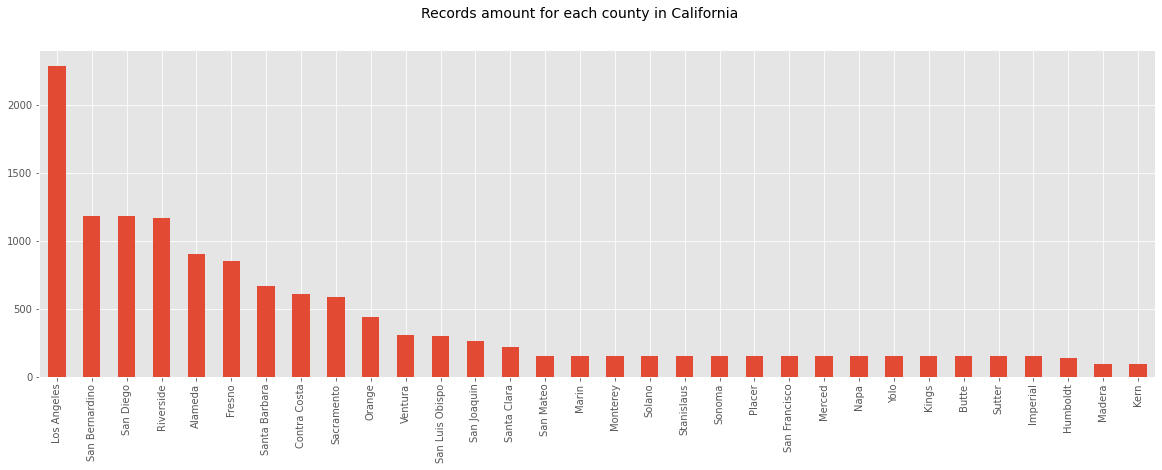

32


In [64]:
datemask = aircalifornia.loc['2020-05-01':'2020-09-30']  #select date series
datemask.head()
counties = datemask.sort_values("COUNTY").groupby("COUNTY")
counties.tail()
countysize = counties.size() #how many records for each countyprint()
print(countysize)

datemask["COUNTY"].value_counts().plot(kind='bar')
plt.suptitle('Records amount for each county in California',fontsize=14)
plt.show()   #can use this histogram to choose counties

print(countysize.count())  #total 32 counties

COUNTY
Alameda            15.460044
Butte               8.923490
Contra Costa        7.871901
Fresno             15.571512
Humboldt            3.408571
Imperial           12.529730
Kern               23.942222
Kings              13.714667
Los Angeles        20.152774
Madera              8.441111
Marin               8.609804
Merced             12.633113
Monterey            6.339869
Napa                6.867550
Orange             17.621088
Placer              9.871053
Riverside          15.420819
Sacramento          9.609508
San Bernardino     29.403544
San Diego          11.621302
San Francisco       9.461184
San Joaquin        13.229545
San Luis Obispo     5.192691
San Mateo           9.594771
Santa Barbara       1.878561
Santa Clara        14.629302
Solano              8.313072
Sonoma              4.873684
Stanislaus         15.972549
Sutter             10.495946
Ventura            10.455446
Yolo                8.535762
Name: Daily Max 1-hour NO2 Concentration, dtype: float64
COUNTY
A

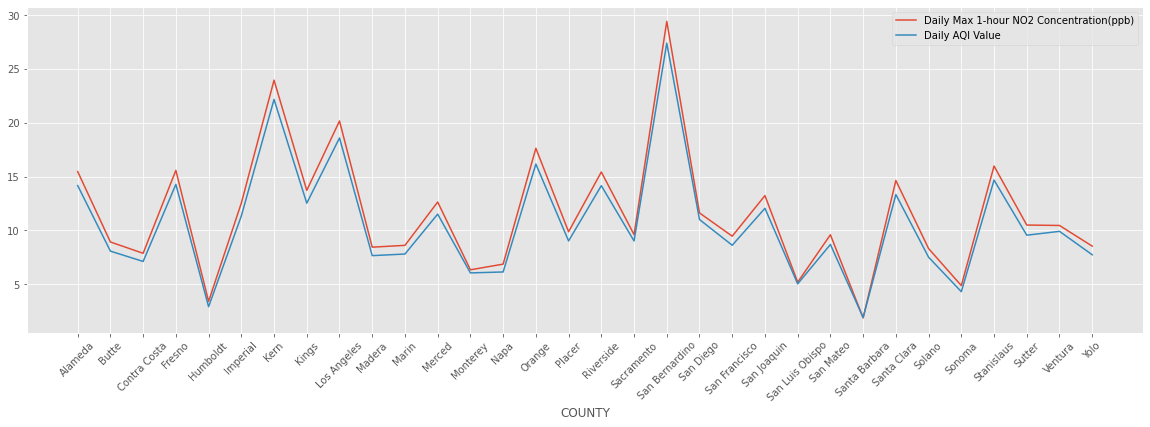

In [95]:
airno2 = counties["Daily Max 1-hour NO2 Concentration"].mean()
airaqi = counties["DAILY_AQI_VALUE"].mean()
print(airno2)
print(airaqi)
ax = pd.concat([airno2, airaqi], axis=1).plot()
ax.set_xticks(range(len(counties)))
ax.set_xticklabels(counties.groups.keys(), rotation=45)
ax.legend(["Daily Max 1-hour NO2 Concentration(ppb)", "Daily AQI Value"])
print()